In [1]:
import pandas as pd
import os
import json
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from scipy import stats,signal
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
import random
import re
import csv
from IPython.display import HTML, display, Image
import tabulate
import math as m
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/cbclab/Dropbox/postdocUPF/jatos_experiments')
import my_functions as myf

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 1
#mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 1
#mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fday = [1,2,3,4,5,6,7,8,9,10]
fsession = [1,2]
session_labels = ['Th','Fr','Sa','Su','Mo','Tu','We','Th','Fr','Sa']

SR_color = {'mood': [0.1,0.5,1],'food': [1,0.5,0.1],'sleep': 'y', 'real_stress':[0.1,0.5,0.2]}
PV_color = {'DO':[1,0,0.4],'SO':[0.4,0,1],'NO':'k'}
PV_line = {'DO':'-','SO':'-','NO':'-'}

key_SR = ['mood','food','sleep', 'real_stress']
key_PV = ['Dsubj_optout_oo','Ssubj_optout_oo','subj_perf_no','OKubj_RT_no','DoverConf','SoverConf','risk_av']
key_name = key_SR+key_PV

pair_keys_SR = list(itertools.combinations(key_SR, 2))
key_SR = ['mood','food','sleep', 'real_stress']
key_SR2plot = [key_SR[:int(len(key_SR)/2)],key_SR[int(len(key_SR)/2):]]

# pair of PV 
pair_keys_PV = list(itertools.combinations(key_PV[:-3], 2))
pair_keys_PV2plot = [pair_keys_PV[:int(len(pair_keys_PV)/2)],pair_keys_PV[int(len(pair_keys_PV)/2):]]
key_name_PV = {'Dsubj_optout_oo':'DO','Ssubj_optout_oo':'SO','subj_perf_no':'acc NO','OKubj_RT_no':'RT NO'}
key_name_PV2 = {'DoverConf':'deterministic\noverconf.','SoverConf':'stochastic\noverconf.',\
                'risk_av':'risk\naversion'}
pair_key_name_PV2plot = [[[key_name_PV[k] for k in tupl] for tupl in lista] for lista in pair_keys_PV2plot]

pair_SR_PV,pair_SR_PV2plot = [],[]
for pv in key_PV:
    aux = []
    for sr in key_SR:
        pair_SR_PV.append((sr,pv))
        aux.append((sr,pv))
    pair_SR_PV2plot.append(aux)

key_diff = ['Dperf_oo', 'Sperf_oo', 'perf_no', 'Dn_trials_oo', 'Sn_trials_oo', 'NOn_trials', \
            'DRT_OKoo', 'SRT_OKoo', 'RT_no', 'RT_noNOK', 'Doptout', 'Soptout']

unique_signals_dots = [1,2,3,4]
unique_signals_gabor = [1,2,3]

main_path = '/home/cbclab/Dropbox/postdocUPF/jatos_experiments'

path_results_dots = main_path + '/dots/notebooks/results_tanda_1/'
path_results_gabor = main_path + '/gabor/notebooks/results_tanda_1/'

Day = 10
Ses = 2
Suj = 3060

In [2]:
file=path_results_dots+'mean_across_participants.json'
with open(file) as f:
    as_dots = json.load(f)
file=path_results_dots+'se_across_participants.json'
with open(file) as f:
    se_dots = json.load(f)

In [3]:
file=path_results_gabor+'mean_across_participants.json'
with open(file) as f:
    as_gabor = json.load(f)
file=path_results_gabor+'se_across_participants.json'
with open(file) as f:
    se_gabor = json.load(f)

In [4]:
f='day'+str(Day)+'/session'+str(Ses)+'/DO_fit_oo_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

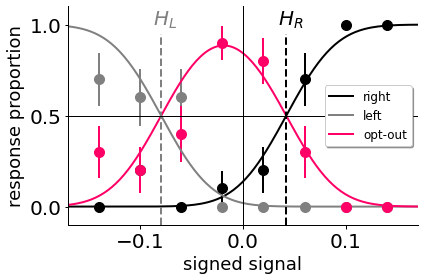

In [5]:
fig = plt.figure()

plt.plot(x_fit,DyR_fit,c='k')   
plt.plot(x_fit,DyL_fit,c='gray')
plt.plot(x_fit,DyO_fit,c=PV_color['DO'])

plt.errorbar(Dsigned_st,Dm_right_oob,Dse_right_oob,c='k',marker='o',ls='')
plt.errorbar(Dsigned_st,Dm_left_oob,Dse_left_oob,c='gray',marker='o',ls='')
plt.errorbar(Dsigned_st,Dm_opt_oob,Dse_opt_oob,c=PV_color['DO'],marker='o',ls='')

plt.legend(("right","left","opt-out"),loc='best', shadow=True,fontsize=12)
plt.xlabel('signed signal')
plt.ylabel('response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([DHR_oo,DHR_oo],[-0.1,0.95],color='k',ls='--')
plt.plot([DHL_oo,DHL_oo],[-0.1,0.95],color='gray',ls='--')
plt.text(DHR_oo-0.008,1,r'$H_R$', ha='left', wrap=True,fontsize=20,color='k')
plt.text(DHL_oo-0.008,1,r'$H_L$', ha='left', wrap=True,fontsize=20,color='gray')
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig4_ex_psychometric_curve.png')
plt.show()

In [6]:
f='day'+str(Day)+'/session'+str(Ses)+'/SO_fit_oo_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

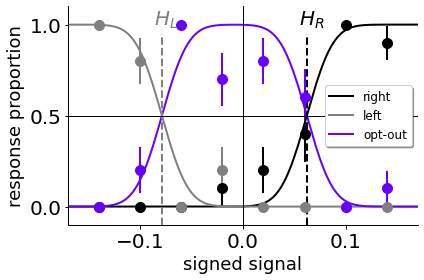

In [7]:
fig = plt.figure()

plt.plot(x_fit,SyR_fit,c='k')   
plt.plot(x_fit,SyL_fit,c='gray')
plt.plot(x_fit,SyO_fit,c=PV_color['SO'])

plt.errorbar(Ssigned_st,Sm_right_oob,Sse_right_oob,c='k',marker='o',ls='')
plt.errorbar(Ssigned_st,Sm_left_oob,Sse_left_oob,c='gray',marker='o',ls='')
plt.errorbar(Ssigned_st,Sm_opt_oob,Sse_opt_oob,c=PV_color['SO'],marker='o',ls='')

plt.legend(("right","left","opt-out"),loc='best', shadow=True,fontsize=12)
plt.xlabel('signed signal')
plt.ylabel('response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([SHR_oo,SHR_oo],[-0.1,0.95],color='k',ls='--')
plt.plot([SHL_oo,SHL_oo],[-0.1,0.95],color='gray',ls='--')
plt.text(SHR_oo-0.008,1,r'$H_R$', ha='left', wrap=True,fontsize=20,color='k')
plt.text(SHL_oo-0.008,1,r'$H_L$', ha='left', wrap=True,fontsize=20,color='gray')
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig4_ex_SO_psychometric_curve.png')
plt.show()

In [8]:
f='day'+str(Day)+'/session'+str(Ses)+'/NO_fit_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

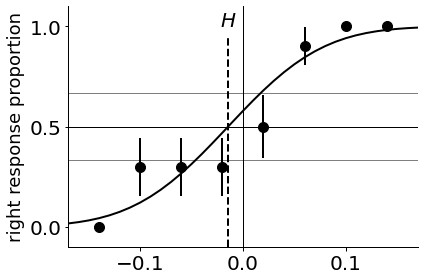

In [9]:
fig = plt.figure()

plt.plot(x_lr,y_pr_no,c='k')   
plt.errorbar(signed_st,m_right_No,se_right_No,c='k',marker='o',ls='')

#plt.xlabel('signed signal')
plt.ylabel('right response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([Hno,Hno],[-0.1,0.95],color='k',ls='--')
plt.text(Hno-0.008,1,r'$H$', ha='left', wrap=True,fontsize=20)
plt.axhline(0.5,color='k',lw=1)
plt.axhline(1/3,color='k',lw=0.5)
plt.axhline(2/3,color='k',lw=0.5)

plt.tight_layout()
plt.savefig('fig4_ex_NOpsychometric_curve.png')
plt.show()

In [10]:
f='day'+str(Day)+'/session'+str(Ses)+'/optimalH_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

In [11]:
long = len(x_fit)
x_fit = np.array(x_fit)
DyR_opt=myf.cumul_norm(x_fit,HRopt_+Hno,Sigma)
DyL_opt=1.0-myf.cumul_norm(x_fit,-HRopt_+Hno,Sigma)
DyO_opt=np.ones(long)-np.array(DyL_opt)-np.array(DyR_opt)

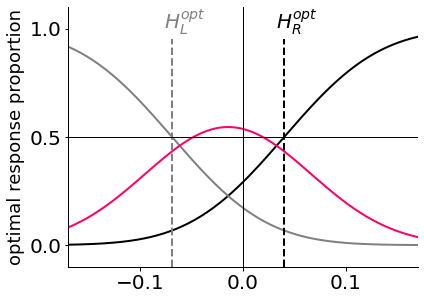

In [12]:
fig = plt.figure(figsize=(6,4.3))

plt.plot(x_fit,DyR_opt,c='k')   
plt.plot(x_fit,DyL_opt,c='gray')
plt.plot(x_fit,DyO_opt,c=PV_color['DO'])

#plt.legend(("right","left","opt-out"),loc='best', shadow=True,fontsize=12)
#plt.xlabel('signed signal')
plt.ylabel('optimal response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([HRopt_+Hno,HRopt_+Hno],[-0.1,0.95],color='k',ls='--')
plt.plot([-HRopt_+Hno,-HRopt_+Hno],[-0.1,0.95],color='gray',ls='--')
plt.text(HRopt_+Hno-0.008,1,r'$H_R^{opt}$', ha='left', wrap=True,fontsize=20,color='k')
plt.text(-HRopt_+Hno-0.008,1,r'$H_L^{opt}$', ha='left', wrap=True,fontsize=20,color='gray')
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig4_ex_optimal_DO_psychometric_curve.png')
plt.show()

In [13]:
SyR_opt=myf.cumul_norm(x_fit,SO_HRopt_+Hno,Sigma)
SyL_opt=1.0-myf.cumul_norm(x_fit,-SO_HRopt_+Hno,Sigma)
SyO_opt=np.ones(long)-np.array(SyL_opt)-np.array(SyR_opt)

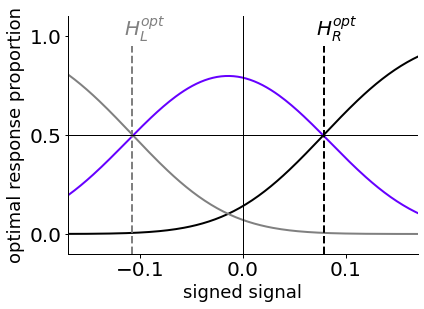

In [14]:
fig = plt.figure(figsize=(6,4.3))

plt.plot(x_fit,SyR_opt,c='k')   
plt.plot(x_fit,SyL_opt,c='gray')
plt.plot(x_fit,SyO_opt,c=PV_color['SO'])

#plt.legend(("right","left","opt-out"),loc='best', shadow=True,fontsize=12)
plt.xlabel('signed signal')
plt.ylabel('optimal response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([SO_HRopt_+Hno,SO_HRopt_+Hno],[-0.1,0.95],color='k',ls='--')
plt.plot([-SO_HRopt_+Hno,-SO_HRopt_+Hno],[-0.1,0.95],color='gray',ls='--')
plt.text(SO_HRopt_+Hno-0.008,1,r'$H_R^{opt}$', ha='left', wrap=True,fontsize=20,color='k')
plt.text(-SO_HRopt_+Hno-0.008,1,r'$H_L^{opt}$', ha='left', wrap=True,fontsize=20,color='gray')
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig4_ex_optimal_SO_psychometric_curve.png')
plt.show()

In [15]:
f='day'+str(Day)+'/session'+str(Ses)+'/NO_fit_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

In [16]:
fig = plt.figure()

plt.plot(x_lr,y_lr_no,c='k')   
plt.errorbar(signed_st,m_right_No,se_right_No,c='k',marker='o',ls='')

#plt.xlabel('signed signal')
plt.ylabel('right response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([Hno,Hno],[-0.1,0.95],color='k',ls='--')
plt.text(Hno-0.008,1,r'$H$', ha='left', wrap=True,fontsize=20)
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
#plt.savefig('fig5_ex_NOpsychometric_curve.png')
plt.show()

NameError: name 'y_lr_no' is not defined

<Figure size 432x288 with 0 Axes>

In [17]:
f='day'+str(Day)+'/session'+str(Ses)+'/optimalH_Sub'+str(Suj)+'_Day'+str(Day)+'_Sess'+str(Ses)+'.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

In [18]:
long = len(x_fit)
x_fit = np.array(x_fit)
DyR_opt=myf.cumul_norm(x_fit,HRopt_,Sigma)
DyL_opt=1.0-myf.cumul_norm(x_fit,-HRopt_,Sigma)
DyO_opt=np.ones(long)-np.array(DyL_opt)-np.array(DyR_opt)

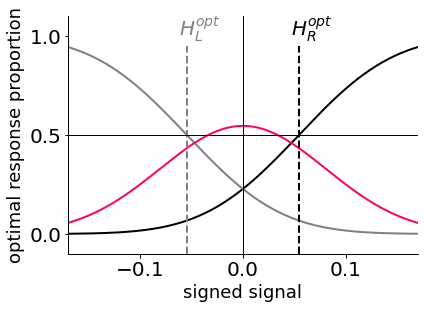

In [19]:
fig = plt.figure(figsize=(6,4.3))

plt.plot(x_fit,DyR_opt,c='k')   
plt.plot(x_fit,DyL_opt,c='gray')
plt.plot(x_fit,DyO_opt,c=PV_color['DO'])

#plt.legend(("right","left","opt-out"),loc='best', shadow=True,fontsize=12)
plt.xlabel('signed signal')
plt.ylabel('optimal response proportion')
plt.ylim([-0.1,1.1])
plt.xlim([-0.17,0.17])
plt.yticks([0,0.5,1])

plt.axvline(0,color='k',lw=1)
plt.plot([HRopt_,HRopt_],[-0.1,0.95],color='k',ls='--')
plt.plot([-HRopt_,-HRopt_],[-0.1,0.95],color='gray',ls='--')
plt.text(HRopt_-0.008,1,r'$H_R^{opt}$', ha='left', wrap=True,fontsize=20,color='k')
plt.text(-HRopt_-0.008,1,r'$H_L^{opt}$', ha='left', wrap=True,fontsize=20,color='gray')
plt.axhline(0.5,color='k',lw=1)

plt.tight_layout()
#plt.savefig('fig5_ex_optimal_DO_psychometric_curve.png')
plt.show()

In [20]:
f='corrBS.json'
with open(path_results_dots+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_dots']=v  

In [21]:
# convert string key into tuples

new_key = {}
for k,v in corr_BS_dots.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_BS_dots[v] = corr_BS_dots.pop(k)
    p_BS_dots[v] = p_BS_dots.pop(k)
    SIG_BS_dots[v] = SIG_BS_dots.pop(k)
    NOS_BS_dots[v] = NOS_BS_dots.pop(k)

In [22]:
f='corrBS.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_gabor']=v  

In [23]:
# convert string key into tuples

new_key = {}
for k,v in corr_BS_gabor.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_BS_gabor[v] = corr_BS_gabor.pop(k)
    p_BS_gabor[v] = p_BS_gabor.pop(k)
    SIG_BS_gabor[v] = SIG_BS_gabor.pop(k)
    NOS_BS_gabor[v] = NOS_BS_gabor.pop(k)

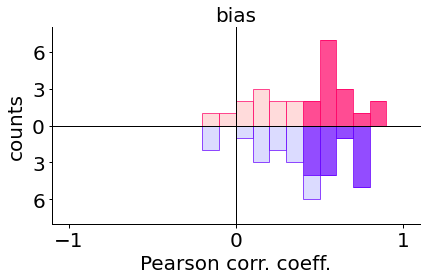

In [24]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_BS_dots[('no_bias', 'HmiddleDO')],NOS_BS_dots[('no_bias', 'HmiddleDO')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.axvline(0,color='k',lw=1)
#ax1.text(-0.9,1,"DO & NO", ha='left', wrap=True,fontsize=20)
ax1.set_title('bias')

ax2.hist([SIG_BS_dots[('no_bias', 'HmiddleSO')],NOS_BS_dots[('no_bias', 'HmiddleSO')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
#ax2.set_xticklabels([])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
#ax2.text(-0.9,7,"SO & NO", ha='left', wrap=True,fontsize=20)
ax2.axvline(0,color='k',lw=1)
ax2.set_xlabel('Pearson corr. coeff.',fontsize=20)

plt.tight_layout()
plt.savefig('fig4_corr_bias_optout&nonoptout_dots.png')
plt.show()

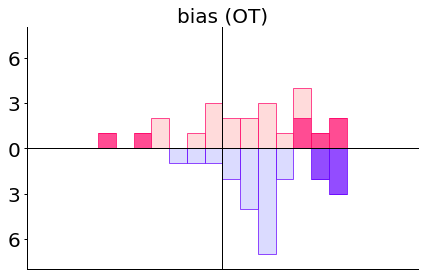

In [27]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_BS_gabor[('no_bias', 'HmiddleDO')],NOS_BS_gabor[('no_bias', 'HmiddleDO')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['DO'],[1,0.8,0.8]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([3,6])
ax1.set_xticks([-1,0,1])
ax1.set_xticklabels([])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.axvline(0,color='k',lw=1)
#ax1.text(-0.9,6,"DO & NO", ha='left', wrap=True,fontsize=20)
ax1.set_title('bias (OT)')

ax2.hist([SIG_BS_gabor[('no_bias', 'HmiddleSO')],NOS_BS_gabor[('no_bias', 'HmiddleSO')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['SO'],[0.8,0.8,1]], edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([0,3,6])
ax2.set_xlim(-1.1,1.1)
#ax2.set_ylabel('bias counts',fontsize=20)
ax2.yaxis.set_label_coords(-0.07,0)
ax2.set_xticks([])
ax2.set_ylim(0,8)
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')
ax2.axvline(0,color='k',lw=1)
#ax2.text(-0.9,7,"SO & NO", ha='left', wrap=True,fontsize=20)
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('fig5_corr_bias_optout&nonoptout_gabor.png')
plt.show()

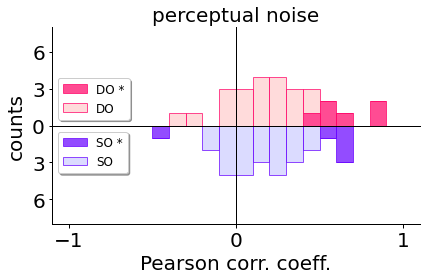

In [28]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_BS_dots[('no_sigma', 'Dsigma_oo')],NOS_BS_dots[('no_sigma', 'Dsigma_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['DO'],[1,0.8,0.8]], edgecolor=PV_color['DO'], linewidth=1)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.set_ylabel('counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.set_title('perceptual noise')

ax2.hist([SIG_BS_dots[('no_sigma', 'Ssigma_oo')],NOS_BS_dots[('no_sigma', 'Ssigma_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['SO'],[0.8,0.8,1]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
#ax2.set_xticklabels([])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_color('k')
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
#ax2.text(-0.9,7,"SO & NO", ha='left', wrap=True,fontsize=20)
ax2.set_xlabel('Pearson corr. coeff.',fontsize=20)

ax1.legend(("DO *","DO"),loc='lower left', shadow=True,fontsize=12)
ax2.legend(("SO *","SO"),loc='upper left', shadow=True,fontsize=12)

ax1.axvline(0,color='k',lw=1)
ax2.axvline(0,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig4_corr_sigma_optout&nonoptout_dots.png')
plt.show()

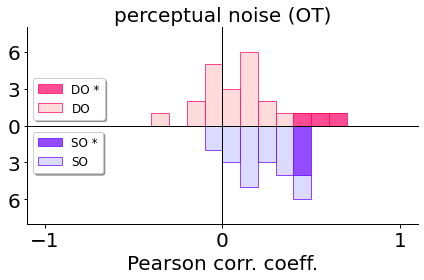

In [29]:
fig ,(ax1,ax2) = plt.subplots(2,1,gridspec_kw={'hspace':0})

ax1.hist([SIG_BS_gabor[('no_sigma', 'Dsigma_oo')],NOS_BS_gabor[('no_sigma', 'Dsigma_oo')]],\
          bins=np.arange(-1,1,0.1),color=[PV_color['DO'],[1,0.8,0.8]],alpha=0.7,histtype='bar',\
         stacked=True,edgecolor=PV_color['DO'], linewidth=1)
#ax1.set_ylabel('perceptual noise counts',fontsize=20)
ax1.yaxis.set_label_coords(-0.07,0)
ax1.set_xticks([])
ax1.set_ylim(0,8)
ax1.set_yticks([0,3,6])
ax1.set_xlim(-1.1,1.1)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('k')
ax1.set_title('perceptual noise (OT)')

ax2.hist([SIG_BS_gabor[('no_sigma', 'Ssigma_oo')],NOS_BS_gabor[('no_sigma', 'Ssigma_oo')]],\
          bins=np.arange(-1,1,0.1),alpha=0.7,histtype='bar', stacked=True, \
          color=[PV_color['SO'],[0.8,0.8,1]], edgecolor=PV_color['SO'], linewidth=1)
ax2.set_yticks([3,6])
ax2.set_xticks([-1,0,1])
ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(0,8)
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True)
ax2.spines['top'].set_linewidth(1)
ax2.spines['top'].set_color('k')

ax2.set_xlabel('Pearson corr. coeff.',fontsize=20)
ax1.legend(("DO *","DO"),loc='lower left', shadow=True,fontsize=12)
ax2.legend(("SO *","SO"),loc='upper left', shadow=True,fontsize=12)

ax1.axvline(0,color='k',lw=1)
ax2.axvline(0,color='k',lw=1)

plt.tight_layout()
plt.savefig('fig5_corr_sigma_optout&nonoptout_gabor.png')
plt.show()

In [30]:
f='corrSR_PV.json'
with open(path_results_dots+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_dots']=v  

In [31]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_PV_dots.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_PV_dots[v] = corr_SR_PV_dots.pop(k)
    p_SR_PV_dots[v] = p_SR_PV_dots.pop(k)
    SIG_SR_PV_dots[v] = SIG_SR_PV_dots.pop(k)
    NOS_SR_PV_dots[v] = NOS_SR_PV_dots.pop(k)

In [32]:
round_p_SR_PV = np.array([myf.roundP(p_SR_PV_dots[(pair)]) for pair in pair_SR_PV])
round_p_SR_PV = np.reshape(round_p_SR_PV,(7,4))
p_value = []
ind = -1
for key in key_PV[4:]:
    ind += 1
    p_value.append(list(round_p_SR_PV[ind]))

In [33]:
round_r_SR_PV = np.array([myf.roundP(np.mean(corr_SR_PV_dots[(pair)])) for pair in pair_SR_PV])
round_r_SR_PV = np.reshape(round_r_SR_PV,(7,4))
r_value = []
r_table = [['r_value']+key_SR]
ind = -1
for key in key_PV[4:]:
    ind += 1
    r_value.append(list(round_r_SR_PV[ind]))
    r_table.append([key]+list(round_r_SR_PV[ind]))
    
display(HTML(tabulate.tabulate(r_table, tablefmt='html')))

r_value,mood,food,sleep,real_stress
DoverConf,-0.006,0.05,-0.06,0.008
SoverConf,-0.005,0.05,-0.06,-0.02
risk_av,0.05,0.007,-0.02,-0.08


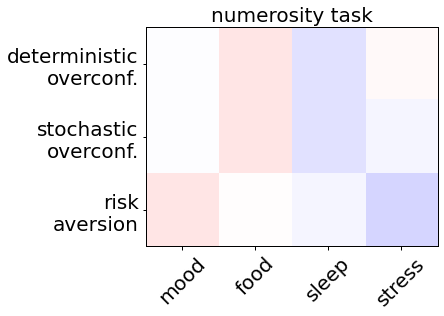

In [34]:
plt.figure(figsize=(6.5,4.5))
plt.title('numerosity task')
plt.imshow(r_value,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),['mood','food','sleep','stress'],rotation=45)
plt.yticks(np.arange(3),[key_name_PV2[k] for k in key_PV[4:]])
#plt.colorbar()
#plt.title('Numerosity task')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

for i in range(3):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_value[i][j]),fontsize=18, ha='center', wrap=True)
plt.tight_layout()
plt.savefig('fig5_SR_PV_corr_dots.png')
plt.show()

In [35]:
f='corrSR_PV.json'
with open(path_results_gabor+f) as f:
    data_pd = json.load(f)
for k, v in data_pd.items():
    globals()[k+'_gabor']=v  

In [36]:
# convert string key into tuples

new_key = {}
for k,v in corr_SR_PV_gabor.items():
    aux = k.split("-")
    new_key[k] = (aux[0],aux[1])
for k,v in new_key.items():
    corr_SR_PV_gabor[v] = corr_SR_PV_gabor.pop(k)
    p_SR_PV_gabor[v] = p_SR_PV_gabor.pop(k)
    SIG_SR_PV_gabor[v] = SIG_SR_PV_gabor.pop(k)
    NOS_SR_PV_gabor[v] = NOS_SR_PV_gabor.pop(k)

In [37]:
round_p_SR_PV = np.array([myf.roundP(p_SR_PV_gabor[(pair)]) for pair in pair_SR_PV])
round_p_SR_PV = np.reshape(round_p_SR_PV,(7,4))
p_value = []
ind = -1
for key in key_PV[4:]:
    ind += 1
    p_value.append(list(round_p_SR_PV[ind]))

In [38]:
round_r_SR_PV = np.array([myf.roundP(np.mean(corr_SR_PV_gabor[(pair)])) for pair in pair_SR_PV])
round_r_SR_PV = np.reshape(round_r_SR_PV,(7,4))
r_value = []
r_table = [['r_value']+key_SR]
ind = -1
for key in key_PV[4:]:
    ind += 1
    r_value.append(list(round_r_SR_PV[ind]))
    r_table.append([key]+list(round_r_SR_PV[ind]))
    
display(HTML(tabulate.tabulate(r_table, tablefmt='html')))

r_value,mood,food,sleep,real_stress
DoverConf,-0.02,0.003,-0.1,0.04
SoverConf,0.05,0.1,0.1,0.005
risk_av,-0.02,0.02,-0.04,0.01


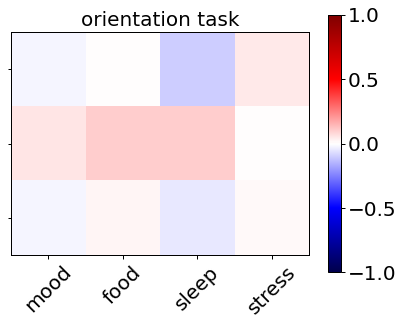

In [39]:
plt.figure(figsize=(5.8,4.5))
plt.title('orientation task')
plt.imshow(r_value,cmap='seismic',interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(np.arange(4),['mood','food','sleep','stress'],rotation=45)
#plt.yticks(np.arange(3),[key_name_PV2[k] for k in key_PV[4:]])
plt.yticks(np.arange(3),[])
plt.colorbar()

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

for i in range(3):
    for j in range(4):
        if i!=j:
            posy = j+0.16
            plt.text(i,posy,myf.p_stars(p_value[i][j]),fontsize=18, ha='center', wrap=True)
            
plt.tight_layout()
plt.savefig('fig5_SR_PV_corr_gabor.png')
plt.show()

In [40]:
f='bias3054.json'
with open(path_results_dots+f) as f:
    data_psy = json.load(f)
for k, v in data_psy.items():
    globals()[k]=v 

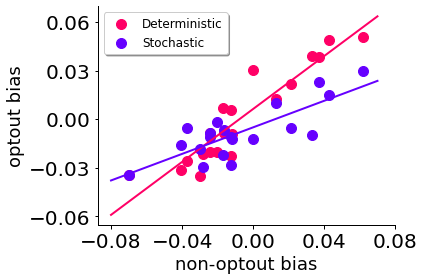

In [41]:
fig,ax = plt.subplots()
ax.plot(np.arange(-0.08,0.08,0.01),interceptD+np.array(np.arange(-0.08,0.08,0.01))*slopeD,color=PV_color['DO'])
ax.scatter(bias_no,biasDoo,color=PV_color['DO'],label="Deterministic")

ax.plot(np.arange(-0.08,0.08,0.01),interceptS+np.array(np.arange(-0.08,0.08,0.01))*slopeS,color=PV_color['SO'])
ax.scatter(bias_no,biasSoo,color=PV_color['SO'],label="Stochastic")

ax.set_yticks([-0.06,-0.03,0,0.03,0.06])
ax.set_xticks([-0.08,-0.04,0,0.04,0.08])
ax.set_xlabel('non-optout bias')
ax.set_ylabel('optout bias')
ax.legend(loc='upper left', shadow=True,fontsize=12)

plt.tight_layout()
plt.savefig('fig5_ex_bias.png')
plt.show()